# Неделя 4
## Градиентный бустинг своими руками

In [1]:
from sklearn import ensemble
import sklearn.datasets as ds
import numpy as np


Загрузка датасета

In [2]:
data = ds.load_boston()

Разделение датасета на целевой признак и оцениваемый. А также разбиение выборки на тренировочную и тестовую.

In [4]:
X = data['data']
y = data['target']

In [8]:
from sklearn.cross_validation import train_test_split

(X_train, 
 X_test, 
 y_train, y_test) =(X[:int(len(X)*0.75)],X[int(len(X)*0.75):], y[:int(len(X)*0.75)], y[int(len(X)*0.75):])

Производная для функции потерь(Квадратичная)  

In [59]:
def grad_func_error(y, predict):
    return (y - predict)

In [13]:
import sklearn.tree as tree

In [39]:
DT_list = [tree.DecisionTreeRegressor(max_depth=5, random_state=42) for _ in range(50)]
coef_list = [0.9 for _ in range(50)]


In [41]:
def gbm_predict(X, DT_list, coef_list):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(DT_list, coef_list)]) for x in X]

In [37]:
DT_list[0].fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [87]:
from sklearn import metrics
base_alg = []
coef = []
s = y_train
for i in range(50):
    #learnt algo
    DT_list[i].fit(X_train, s)
    # add to composition
    base_alg.append(DT_list[i])
    coef.append(coef_list[i])
    s = grad_func_error(y_train,gbm_predict(X_train, base_alg, coef))

    
    

In [65]:
def write_answer_1(score):
    with open("gradient_boosting_1.txt", "w") as fout:
        fout.write(str(score))
score = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test, base_alg, coef)))
print score
write_answer_1(score)

4.81089328026


Уменьшение шага вблизи минимума ошибок

In [84]:
base_alg = []
coef = []
s = y_train
for i in range(50):
    #learnt algo
    DT_list[i].fit(X_train, s)
    # add to composition
    base_alg.append(DT_list[i])
    coef.append(0.9/(1.0+i))
    s = grad_func_error(y_train,gbm_predict(X_train, base_alg, coef))


In [86]:
def write_answer_2(score):
    with open("gradient_boosting_2.txt", "w") as fout:
        fout.write(str(score))
score = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test, base_alg, coef)))
print score
write_answer_2(score)

4.81089328026


In [74]:
from sklearn import ensemble
def grad_boost_param(n_trees, depth):
    grad_boost = ensemble.GradientBoostingRegressor(n_estimators=n_trees, max_depth=depth)
    grad_boost.fit(X_train, y_train)
    return np.sqrt(metrics.mean_squared_error(y_test, grad_boost.predict(X_test)))
print grad_boost_param(50, 5)                   

4.95657741296


In [75]:
%matplotlib inline

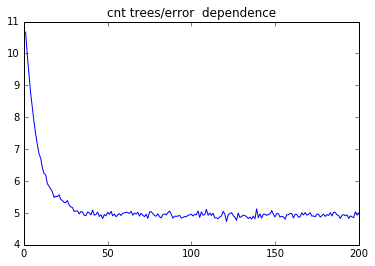

In [79]:
from matplotlib import pyplot as plt
score = [grad_boost_param(_, 5) for _ in range(1,201)]
plt.plot(range(1,201),score)
plt.title('cnt trees/error  dependence')

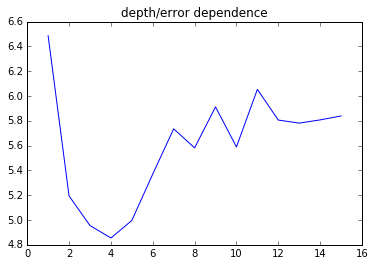

In [81]:
score = [grad_boost_param(50, _) for _ in range(1,16)]
plt.plot(range(1,16),score)
plt.title('depth/error dependence')

Сравнение ошибки после обучения данных с помощью линейной регрессии

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)



8.27046803494


In [82]:
def write_answer_4(score):
    with open("gradient_boosting_4.txt", "w") as fout:
        fout.write(str(score))
score = np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))
write_answer_4(score)